In [187]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import seaborn as sns
import pickle

In [188]:
df = pd.read_csv("Data/Housing.csv")

In [189]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [190]:
df.dropna(inplace=True)

In [7]:
len(df)

545

In [191]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [192]:
def plot_feature(df, predictor, feature):
    
    plt.bar(df[feature], df[predictor], width = 0.6)
    plt.xlabel(feature)
    plt.ylabel(predictor)
    
    plt.show()

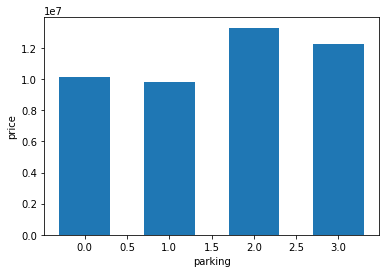

In [193]:
plot_feature(df, "price", "parking")

In [194]:
def custom_encoding(vals, cols, df):
    cnt = len(vals)
    replace_dct = {}
    for col in cols:
        replace_dct[col] = {}
        for i in range(cnt):
            replace_dct[col][vals[i]] = i
            
    final_df = df.replace(replace_dct)
    return final_df
        

In [195]:
encoded_df = custom_encoding(["no", "yes"], ["guestroom","mainroad", "guestroad", "basement", "hotwaterheating", "airconditioning", "prefarea"], df)

In [196]:
encoded_df.d

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [51]:
encoded_df = custom_encoding(["semi-furnished", "unfurnished", "furnished"], ["furnishingstatus"], encoded_df)

In [198]:
encoded_df.drop(columns=["furnishingstatus"], inplace=True)

In [199]:
isf = IsolationForest()
dtct_outl = isf.fit_predict(encoded_df)

In [201]:
encoded_df["outliers"] = dtct_outl
encoded_df = encoded_df[encoded_df["outliers"] != -1]

In [213]:
encoded_df.drop(columns=["outliers"], inplace=True)

C:\Users\maksi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [225]:
min(encoded_df["price"])

1750000

In [214]:
encoded_df.drop(columns=)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
24,8575000,8800,3,2,2,1,0,0,0,1,2,0
27,8400000,8875,3,1,1,1,0,0,0,0,1,0
30,8400000,7475,3,2,4,1,0,0,0,1,2,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0
42,7700000,6480,3,2,4,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
539,1855000,2990,2,1,1,0,0,0,0,0,1,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [215]:
X = encoded_df.iloc[:, 2:]
y = encoded_df[["price"]]

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [217]:
y_test

,price
448,3150000
274,4340000
359,3710000
81,6615000
253,4515000
...,...
286,4235000
397,3500000
469,3010000
366,3675000


In [218]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [219]:
X_test["mean"] = X_test.mean(axis=1)

<AxesSubplot:xlabel='price', ylabel='mean'>

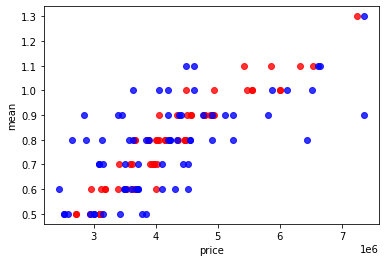

In [220]:
sns.regplot(y_pred, X_test["mean"], color="red", fit_reg = False)
sns.regplot(y_test, X_test["mean"], color="blue", fit_reg = False)

In [221]:
X_test

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,mean
448,2,1,1,1,0,0,0,0,2,0,0.7
274,4,1,2,1,0,0,0,0,0,0,0.8
359,3,1,1,1,0,0,0,0,1,0,0.7
81,3,2,2,1,0,1,0,1,1,0,1.1
253,2,1,2,1,0,0,0,0,0,1,0.7
...,...,...,...,...,...,...,...,...,...,...,...
286,3,1,1,1,0,1,0,0,0,1,0.8
397,2,1,1,1,0,0,0,0,1,0,0.6
469,2,1,1,1,0,0,0,0,0,0,0.5
366,2,1,1,1,0,1,0,0,0,0,0.6


In [222]:
X_test.drop(columns = ["mean"], inplace = True)

In [223]:
name_of_the_model = r"Ml Models/housing_prices_pred_without_furnishing.pkl"
pickle.dump(reg, open(name_of_the_model, "wb+"))

In [181]:
loaded_model = pickle.load(open(r"ML Models/housing_prices_pred.pkl", 'rb'))

In [186]:
loaded_model.predict(X_test)

array([[3699860.5824186 ],
       [3207337.45738281],
       [3207337.45738281],
       [3603375.2328777 ],
       [3529734.57085914],
       [4282347.36958663],
       [4022257.69589493],
       [3717523.34028286],
       [3466184.83707931],
       [5038066.07614932],
       [2776128.90136579],
       [3619292.9477015 ],
       [3230550.68997383],
       [3388719.15360216],
       [4258451.76359343],
       [4944314.13277969],
       [3619292.9477015 ],
       [3671850.17422958],
       [4153991.1890708 ],
       [4887875.50369038],
       [3292098.65862717],
       [4321441.57678024],
       [3207337.45738281],
       [3772855.61125618],
       [3633515.43816725],
       [4533742.70467321],
       [6622042.6747722 ],
       [4072039.49214149],
       [4580169.16985524],
       [4514723.03860946],
       [4322818.07475203],
       [4258451.76359343],
       [4265378.73629197],
       [4574469.13233932],
       [3632762.1390385 ],
       [3466184.83707931],
       [6718896.56938177],
 